# 01 - Uploading, Reading, & Preprocessing Image Data

### 1. Imports

In [373]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# os & image imports
import os
from PIL import Image

# keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Precision, Recall, SpecificityAtSensitivity, SensitivityAtSpecificity

# sklearn
from sklearn.metrics import ConfusionMatrixDisplay

To read the data in and also store the labels, I am going to make a dataframe by iterating through the contents of the `archive` folder under the `data` directory. Each images are further split into `Testing` and `Training` folders, each with separate directories for images corresponding to the type of tumor: Glioma, Meningioma, Pituitary, No Tumor.

In [11]:
# define paths to test & train directories
test_directory = './data/archive/Testing'
train_directory = './data/archive/Training'

---
### 2. Manual Preprocessing

In [167]:
def image_to_df(filepath):
    
    base = os.listdir(filepath)
    base.remove('.DS_Store') # removes this element from the list, remaining should be the actual folders
    
    X = []
    y = []
    img_path = []
    folder_path = []
    
    for folder_name in base:
        images = os.listdir(filepath + f'/{folder_name}')
        for i in images:
            if i.endswith(".jpg"):
                image = Image.open(f'{filepath}/{folder_name}/{i}') # open the image
                image = image.resize((256,256)) # resize to 256x256
                image = image.convert('L') # convert all to grayscale
                image = np.array(image) / 255. # turn image into an array of matrices & rescale!
                X.append(image)
                y.append(folder_name)
                img_path.append(f'{filepath}/{folder_name}/{i}')
                folder_path.append(f'{filepath}/{folder_name}')
            
    return pd.DataFrame(data={'folder_path': folder_path,'img_path': img_path, 'image_data': X, 'label': y})

In [168]:
# storing the output of the function for test data
test_df = image_to_df(test_directory)

In [169]:
# storing the output of the function for train data
train_df = image_to_df(train_directory)

In [170]:
test_df.head()

,folder_path,img_path,image_data,label
0,./data/archive/Testing/pituitary,./data/archive/Testing/pituitary/Te-pi_0233.jpg,"[[0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0...",pituitary
1,./data/archive/Testing/pituitary,./data/archive/Testing/pituitary/Te-pi_0227.jpg,"[[0.00392156862745098, 0.00392156862745098, 0....",pituitary
2,./data/archive/Testing/pituitary,./data/archive/Testing/pituitary/Te-pi_0019.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary
3,./data/archive/Testing/pituitary,./data/archive/Testing/pituitary/Te-pi_0031.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary
4,./data/archive/Testing/pituitary,./data/archive/Testing/pituitary/Te-pi_0025.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary


In [171]:
train_df.head()

,folder_path,img_path,image_data,label
0,./data/archive/Training/pituitary,./data/archive/Training/pituitary/Tr-pi_0505.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary
1,./data/archive/Training/pituitary,./data/archive/Training/pituitary/Tr-pi_0263.jpg,"[[0.00392156862745098, 0.00392156862745098, 0....",pituitary
2,./data/archive/Training/pituitary,./data/archive/Training/pituitary/Tr-pi_0277.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary
3,./data/archive/Training/pituitary,./data/archive/Training/pituitary/Tr-pi_1169.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",pituitary
4,./data/archive/Training/pituitary,./data/archive/Training/pituitary/Tr-pi_0511.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...",pituitary


In [ ]:
##### add more here

In [380]:
train_df['label'].value_counts(normalize = True)

label
notumor       0.279237
pituitary     0.255077
meningioma    0.234419
glioma        0.231268
Name: proportion, dtype: float64

In [381]:
test_df['label'].value_counts(normalize = True)

label
notumor       0.308924
meningioma    0.233410
pituitary     0.228833
glioma        0.228833
Name: proportion, dtype: float64

In [184]:
print(f'Images in Training across all 4 classes: {len(train_df)}')
print("===============================================")
print(f'Images in Testing across all 4 classes: {len(test_df)}')

Images in Training across all 4 classes: 5712
Images in Testing across all 4 classes: 1311


In [185]:
print(f'Testing image array: {test_df.iloc[0,2].shape}')
print(f'Training image array: {train_df.iloc[0,2].shape}')
print("===============================================")
print('256 x 256 is expected since I resized the images in my above function.')

Testing image array: (256, 256)
Training image array: (256, 256)
256 x 256 is expected since I resized the images in my above function.


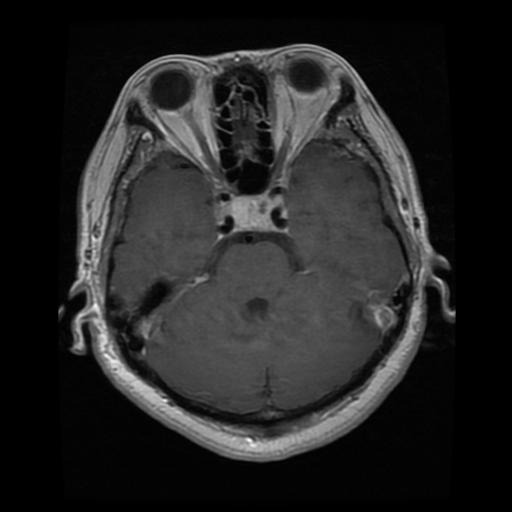

In [377]:
# let's take a look at some image samples
Image.open(train_df.iloc[0,1])

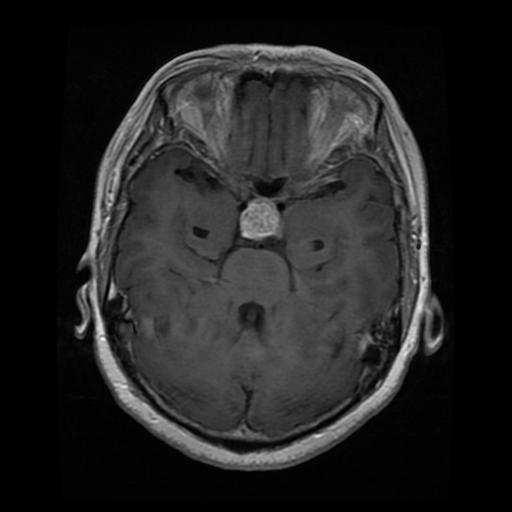

In [378]:
Image.open(train_df.iloc[45,1])

In [176]:
#### EDA CAN BE PERFORMED HERE ON THE CLASS LABELS AND PORTION OF EACH CLASS (or in a separate jpynb)

At this point, I had a training and testing dataframe that consisted of a filepath, array data, and class label for each image. The array data was extracted from the function I wrote to put the dataframes together which included the preprocessing workflows (resizing, rescaling, and converting images to 'L' (grayscale). However, I realized after this point that there is more preprocessing I can do, and I was recommneded by the TA to try using `ImageDataGenerator` from `keras`. So, I will work through the preprocessing workflow again using the filepaths I already have in my dataframe, but this time I will try to do it via `ImageDataGenerator`. This will also allow me to do things like include batches of images to feed into my model and augment the data, which may help improve model performance.

---
### 3. Preprocessing with `ImageDataGenerator()`

In [236]:
# instantiate ImageDataGenerator Class (called 'idg')
idg_train = ImageDataGenerator(horizontal_flip = True,
                        rescale = 1./255,)


# keep testing separate to prevent data leakage
idg_test = ImageDataGenerator(rescale = 1./255) 

#### **1. Training Data Generator**

In [237]:
train_data_gen = idg_train.flow_from_dataframe(train_df, 
                             x_col = 'img_path', 
                             y_col = 'label',
                             class_mode = 'categorical',
                             target_size = (256,256),
                             batch_size = 32,
                             color_mode = 'grayscale',
                             classes = {'notumor': 0, 'glioma': 1, 'meningioma': 2, 'pituitary': 3}) # setting the default class indices

Found 5712 validated image filenames belonging to 4 classes.


In [238]:
# dictionary - numerical representations for each categorical var
train_data_gen.class_indices

{'notumor': 0, 'glioma': 1, 'meningioma': 2, 'pituitary': 3}

#### **2. Testing Data Generator**

In [239]:
test_data_gen = idg_test.flow_from_dataframe(test_df, 
                             x_col = 'img_path', 
                             y_col = 'label',
                             class_mode = 'categorical',
                             target_size = (256,256),
                             batch_size = 32,
                             color_mode = 'grayscale',
                             classes = {'notumor': 0, 'glioma': 1, 'meningioma': 2, 'pituitary': 3}) # setting the default class indices

Found 1311 validated image filenames belonging to 4 classes.


In [240]:
# ensure labels are presented the same as train
test_data_gen.class_indices

{'notumor': 0, 'glioma': 1, 'meningioma': 2, 'pituitary': 3}

In [241]:
print(train_data_gen.image_shape)
print(test_data_gen.image_shape)

# this is accurate (256x256 size) and 1 for the channel (black/white)

(256, 256, 1)
(256, 256, 1)


---
### 4. Building the First Model

In [315]:
# instantiating Sequential model, 'model_1'
model_1 = Sequential()

# layer 1
model_1.add(Conv2D(32, 3, activation = "relu", input_shape = (256, 256, 1))) # input shape is 256 x 256, 1 channel
model_1.add(MaxPooling2D(pool_size = 2))

# layer 2
model_1.add(Conv2D(64, 3, activation = "relu",)) # NOTE: no need for an additional input shape here, only needed for the first blocj
model_1.add(MaxPooling2D(pool_size = 2))

# # layer 3
# model_1.add(Conv2D(128, 3, activation = "relu", input_shape = (256, 256, 1)))
# model_1.add(MaxPooling2D(pool_size = 2))

# # layer 4
# model_1.add(Conv2D(256, 3, activation = "relu", input_shape = (256, 256, 1)))
# model_1.add(MaxPooling2D(pool_size = 2))

# flatten
model_1.add(Flatten())

# output layer
model_1.add(Dense(4, activation = 'softmax')) # we want 4 outputs (4 classes) and 'softmax' activation to give us the probability

# let's view a summary of model_1
print(f"Model Summary:")
print("="*20)
print(model_1.summary())

# compiling the model
model_1.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy', # need categorical_crossentropy since multiclass classification
               metrics = ['accuracy', Precision(), Recall()])

In [318]:
# fitting the model to training data
history_1 = model_1.fit(train_data_gen, epochs = 10, validation_data = test_data_gen)

Epoch 1/10
179/179 [==============================] - 190s 1s/step - loss: 0.7165 - accuracy: 0.7241 - precision_6: 0.7926 - recall_6: 0.6436 - val_loss: 0.4827 - val_accuracy: 0.8398 - val_precision_6: 0.8600 - val_recall_6: 0.8063
Epoch 2/10
179/179 [==============================] - 188s 1s/step - loss: 0.3591 - accuracy: 0.8661 - precision_6: 0.8817 - recall_6: 0.8529 - val_loss: 0.3105 - val_accuracy: 0.8879 - val_precision_6: 0.9026 - val_recall_6: 0.8696
Epoch 3/10
179/179 [==============================] - 193s 1s/step - loss: 0.2250 - accuracy: 0.9196 - precision_6: 0.9268 - recall_6: 0.9139 - val_loss: 0.3771 - val_accuracy: 0.8467 - val_precision_6: 0.8490 - val_recall_6: 0.8406
Epoch 4/10
179/179 [==============================] - 247s 1s/step - loss: 0.1502 - accuracy: 0.9501 - precision_6: 0.9538 - recall_6: 0.9471 - val_loss: 0.2594 - val_accuracy: 0.9153 - val_precision_6: 0.9194 - val_recall_6: 0.9138
Epoch 5/10
179/179 [==============================] - 202s 1s/step -

---

### 5. Evaluating the Model

In [331]:
# the .history attribute outputs a dictionary of the metrics over each epoch the model ran for both training and validation sets
history_1.history

{'loss': [0.7164714336395264,
  0.3590937554836273,
  0.22500599920749664,
  0.15023061633110046,
  0.10895682871341705,
  0.08184146881103516,
  0.054025910794734955,
  0.0434538833796978,
  0.03564882278442383,
  0.02890860103070736],
 'accuracy': [0.7240896224975586,
  0.8660714030265808,
  0.9196428656578064,
  0.9501050710678101,
  0.9649859666824341,
  0.9740896224975586,
  0.9826680421829224,
  0.9859943985939026,
  0.9905462265014648,
  0.9917716979980469],
 'precision_6': [0.7925829887390137,
  0.8816503882408142,
  0.9268465638160706,
  0.9538081884384155,
  0.9663099050521851,
  0.9745836853981018,
  0.9831755757331848,
  0.9859919548034668,
  0.9905462265014648,
  0.9919453859329224],
 'recall_6': [0.6435574293136597,
  0.8529411554336548,
  0.9138655662536621,
  0.9471288323402405,
  0.9641106724739075,
  0.9733893275260925,
  0.9821428656578064,
  0.9858193397521973,
  0.9905462265014648,
  0.9917716979980469],
 'val_loss': [0.48272156715393066,
  0.31052201986312866,
  0

#### 1. **Graphing Training vs. Validation Loss, Accuracy, Precision, & Recall**

In [333]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'precision_6', 'recall_6', 'val_loss', 'val_accuracy', 'val_precision_6', 'val_recall_6'])

In [347]:
# let's save the history output in separate lists
train_loss = history_1.history['loss']
train_acc = history_1.history['accuracy']
train_precision = history_1.history['precision_6']
train_recall = history_1.history['recall_6']

val_loss = history_1.history['val_loss']
val_acc = history_1.history['val_accuracy']
val_precision = history_1.history['val_precision_6']
val_recall = history_1.history['val_recall_6']

epochs = [i+1 for i in history_1.epoch] # quick list comprehension since the original epochs list is from 0 - 9

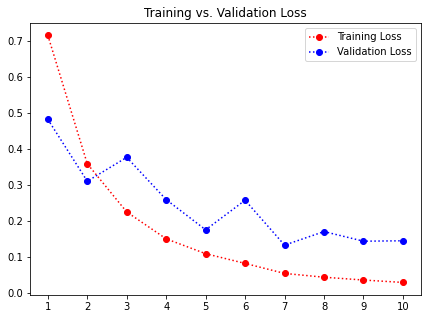

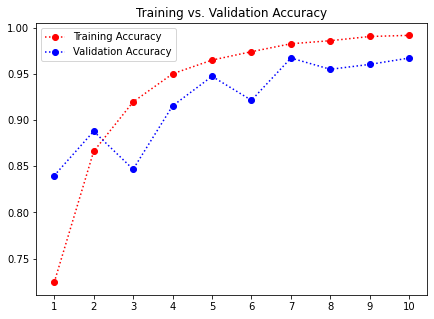

In [367]:
# plotting
plt.figure(figsize = (7,5))
plt.plot(epochs, train_loss, 'o:r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'o:b', label = 'Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.xticks(epochs)
plt.savefig('./graphs/train_val_loss.jpeg', dpi = 1080);

# some overfitting, but not extremely overfit
# validation loss ceases to improve after 7th epoch

plt.figure(figsize = (7,5))
plt.plot(epochs, train_acc, 'o:r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'o:b', label = 'Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.xticks(epochs)
plt.savefig('./graphs/train_val_accuracy.jpeg', dpi = 1080);

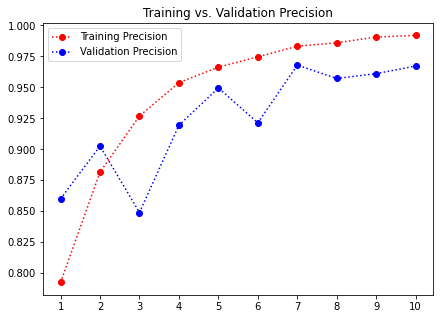

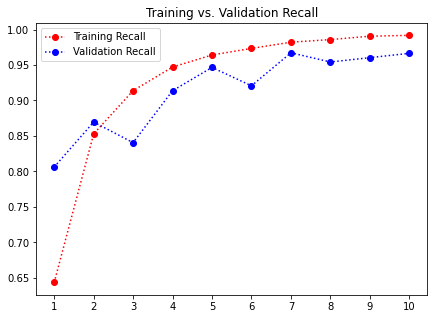

In [368]:
# plotting
plt.figure(figsize = (7,5))
plt.plot(epochs, train_precision, 'o:r', label = 'Training Precision')
plt.plot(epochs, val_precision, 'o:b', label = 'Validation Precision')
plt.legend()
plt.title('Training vs. Validation Precision')
plt.xticks(epochs)
plt.savefig('./graphs/train_val_precision.jpeg', dpi = 1080);

# some overfitting, but not extremely overfit
# validation loss ceases to improve after 7th epoch

plt.figure(figsize = (7,5))
plt.plot(epochs, train_recall, 'o:r', label = 'Training Recall')
plt.plot(epochs, val_recall, 'o:b', label = 'Validation Recall')
plt.legend()
plt.title('Training vs. Validation Recall')
plt.xticks(epochs)
plt.savefig('./graphs/train_val_recall.jpeg', dpi = 1080);

Across all metrics, after about the 7th epoch, the validation scores seemed to plateu. There is little bit of overfitting with the difference between the training and vaidation scores hovering between 2-3%. <br> 

To make the model stronger and reduce overfitting, I can add a Dropout layer. The previous model already included augmenting the training images, but adding a Dropout layer may mitigate some of the overfitting a little more. To make the model even stronger, I can also include a pre-trained base model and append my own additional layers to initiate transfer learning.

In [369]:
# these scores will be the same as the final epoch since I used the same test dataset for validation purposes
model_1.evaluate(test_data_gen)

41/41 [==============================] - 13s 300ms/step - loss: 0.1448 - accuracy: 0.9672 - precision_6: 0.9672 - recall_6: 0.9664


[0.1448284387588501, 0.9672006368637085, 0.9671755433082581, 0.966437816619873]

#### 2. Generating Predictions & Confusion Matrix